<a href="https://colab.research.google.com/github/yayo21aj/EDD_1358/blob/main/El_juego_de_la_vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

def init(Nx, Ny):
    C = [[0 for j in range(Nx)] for i in range(Ny)]
    for i in range(Ny):
        for j in range(Nx):
            C[i][j] = random.randint(0,1)
    return C

C0 = init(5, 5)
C0

[[0, 0, 0, 0, 1],
 [1, 1, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [1, 0, 1, 1, 0],
 [1, 1, 1, 1, 1]]

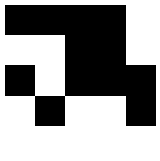

In [ ]:
import matplotlib.pyplot as plt

def plot(C, ax=None):
    if ax is None:
        fig, ax = plt.subplots(dpi=50)
    ax.imshow(C, cmap="gray")
    ax.axis('off')

plot(C0)

In [ ]:
def gol(C, MAX_IT):
    count = 0
    Cs = [C]
    Ny, Nx = len(C), len(C[0])
    while count < MAX_IT:
        C0 = [[0 for j in range(Nx)] for i in range(Ny)]
        for i in range(Ny):
            for j in range(Nx):
                c = C[i][j]
                v = 0
                # la primer columna no tiene vecino a la izquierda
                if j > 0:
                    v += C[i][j-1]
                # la última columna no tiene vecino a la derecha
                if j < Nx - 1:
                    v += C[i][j+1]
                # la primer fila no tiene vecino arriba
                if i > 0:
                    v += C[i-1][j]
                    # la primer columna no tiene vecino a la izquierda
                    if j > 0:
                        v += C[i-1][j-1]
                    # la última columna no tiene vecino a la derecha
                    if j < Nx - 1:
                        v += C[i-1][j+1]
                # la útlima fila no tiene vecino abajo
                if i < Ny - 1:
                    v += C[i+1][j]
                    # la primer columna no tiene vecino a la izquierda
                    if j > 0:
                        v += C[i+1][j-1]
                    # la última columna no tiene vecino a la derecha
                    if j < Nx - 1:
                        v += C[i+1][j+1]
                # nuevo estado
                if c == 0 and v == 3:
                    C0[i][j] = 1
                elif c == 1 and (v == 2 or v == 3):
                    C0[i][j] = 1
                else:
                    C0[i][j] = 0
        Cs.append(C0)
        C = C0
        count += 1
    return Cs


In [ ]:
C = init(10, 10) #tamaño de la tabla
Cs = gol(C, 10) #nùmero de iteraciones

In [ ]:
from matplotlib import animation, rc
rc('animation', html='html5')

def update(i):
    ax.clear()
    ax.imshow(Cs[i], cmap="gray")
    ax.axis('off')
    return ax

fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=1000)
plt.close()

anim